In [3]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/paulwababu/datasets/main/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [12]:
# Preprocessing
key = {"M":1, "F":0}
df["Sex"] = df["Sex"].map(key)

key = {"HIGH":0, "LOW":1, "NORMAL":2}
df["BP"] = df["BP"].map(key)

key = {"HIGH":0, "LOW":1, "NORMAL":2}
df["Cholesterol"]=df["Cholesterol"].map(key) 
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [13]:
# Separate Feature and Target
features = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = df[features]

y = df["Drug"]


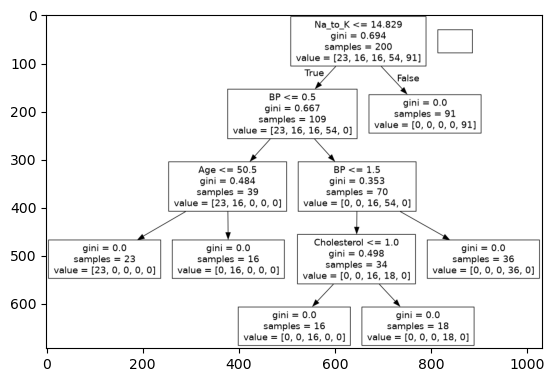

In [18]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png("mydecisiontree.png")

img = pltimg.imread("mydecisiontree.png")
imgplot = plt.imshow(img)
plt.show()

In [19]:
print(df['Drug'].value_counts())

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


## Prediction 
**Question :** What prescription(among the five drugs: Y X A B C) should a 68- year old femlae with normal levels of cholesterol and BP and has salt to postassium level of 27.10 take? 

In [22]:
dtree.predict([[68,0, 2, 2, 27.10]])

/home/nebula/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

In [23]:
joblib.dump(dtree, 'DecisionTreeModel.joblib')

['DecisionTreeModel.joblib']